In [1]:
%matplotlib inline

import pickle
from transformers import AutoTokenizer, AutoModelForCausalLM

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import clear_output
from collections import Counter
os.chdir("../")

from src import utils
from src.opt_tok import optimal_tokenization
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


t_val = 2.015 # t-value for 90% confidence interval


# LLama-1B

## Success probability

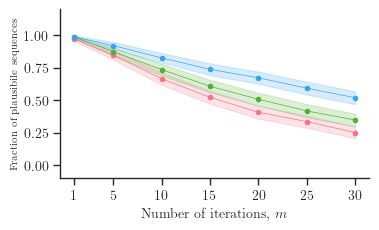

In [10]:


#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)

suc_proba_085 = np.array(data_085["top_p_count"])/np.array(data_085["total_outputs"])
suc_proba_09 = np.array(data_09["top_p_count"])/np.array(data_09["total_outputs"])
suc_proba_095 = np.array(data_095["top_p_count"])/np.array(data_095["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_085, suc_proba_09, suc_proba_095)),
    'top-p': ['085'] * len(suc_proba_085) + ['09'] * len(suc_proba_09) + ['095'] * len(suc_proba_095),
    'splits' : [1,5,10,15,20,25,30] * 3, 
    "errors" : np.concatenate(( get_bin_error(suc_proba_085), get_bin_error(suc_proba_09), get_bin_error(suc_proba_095)))
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_085-get_bin_error(suc_proba_085), suc_proba_085+get_bin_error(suc_proba_085), color=palette[0], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_09-get_bin_error(suc_proba_09), suc_proba_09+get_bin_error(suc_proba_09), color=palette[1], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_095-get_bin_error(suc_proba_095), suc_proba_095+get_bin_error(suc_proba_095), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

#ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)
plt.legend().set_visible(False)

#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([ 1,5,10,15,20,25,30], [ 1,5,10,15,20,25,30])
ax.set_ylim(-0.1,1.2)
fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_1B_topp.pdf', dpi=300)


In [128]:
os.chdir("/NL/token-pricing/work")

print(os.getcwd())

/NL/token-pricing/work


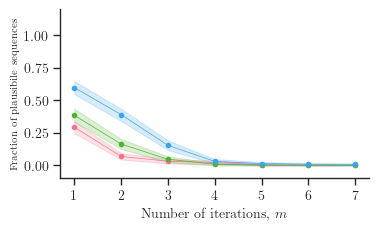

In [11]:


#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_20000_prompt_idare you .pkl", "rb") as f:
    data_20000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)
    
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)

suc_proba_5000 = np.array(data_5000["top_k_count"])/np.array(data_5000["total_outputs"])
suc_proba_20000 = np.array(data_20000["top_k_count"])/np.array(data_20000["total_outputs"])
suc_proba_30000 = np.array(data_30000["top_k_count"])/np.array(data_30000["total_outputs"])
suc_proba_40000 = np.array(data_40000["top_k_count"])/np.array(data_40000["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_5000, suc_proba_30000, suc_proba_40000)),
    'top-k': ['5000'] * len(suc_proba_5000) +  ['30000'] * len(suc_proba_30000) + ['40000'] * len(suc_proba_40000), 
    'splits' : [1,2,3,4,5,6,7] * 3
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_5000-get_bin_error(suc_proba_5000), suc_proba_5000+get_bin_error(suc_proba_5000), color=palette[0], alpha=0.2)

#ax.fill_between([1,2,3,4,5,6,7], suc_proba_20000-get_bin_error(suc_proba_20000), suc_proba_20000+get_bin_error(suc_proba_20000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_30000-get_bin_error(suc_proba_30000), suc_proba_30000+get_bin_error(suc_proba_30000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_40000-get_bin_error(suc_proba_40000), suc_proba_40000+get_bin_error(suc_proba_40000), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=30000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=5000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([1,2,3,4,5,6,7], [1,2,3,4,5,6,7])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_1B_topk.pdf', dpi=300)


## Total gain

0
1
2


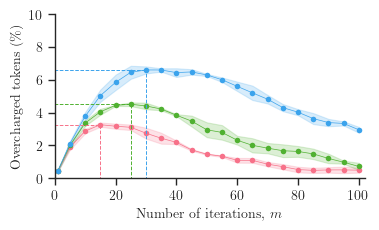

3.2671734001133164 4.512090479867636 6.601712595250331
15 25 30


In [159]:
#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)


splits = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

percentage_085 = []
percentage_09 = []
percentage_095 = []

for seq_idx in range(len((data_085["top_p_count"]))):
    print(seq_idx)
    percentage_085.append( np.array( [ data_085["top_p_count"][seq_idx][i]  * splits[i] / sum(data_085["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )




mean_085 = np.mean( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)
std_085 = np.std( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)

mean_09 = np.mean( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)
std_09 = np.std( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)

mean_095 = np.mean( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)
std_095 = np.std( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)




df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_085, mean_09, mean_095)),
    'top-p': ['085'] * len(mean_085) + ['09'] * len(mean_09) + ['095'] * len(mean_095),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_085-std_085, mean_085+std_085, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_09-std_09, mean_09+std_09, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_095-std_095, mean_095+std_095, color=palette[2], alpha=0.2)


#Plot the maximum of each curve
x_max_085 = splits[np.argmax(mean_085) ]      # x-coordinate at the maximum
y_max_085 = mean_085[ np.argmax(mean_085)]      # Maximum y value

x_max_09 = splits[np.argmax(mean_09) ]      # x-coordinate at the maximum
y_max_09 = mean_09[ np.argmax(mean_09)]      # Maximum y value

x_max_095 = splits[np.argmax(mean_095) ]      # x-coordinate at the maximum
y_max_095 = mean_095[ np.argmax(mean_095)]      # Maximum y value



# Plot the horizontal and vertical lines
#plt.axhline(y=y_max_085, xmin=0, xmax= x_max_085, color=palette[2], linestyle='--')
#plt.axvline(x=x_max_085, ymin=0, ymax= y_max_085, color=palette[2], linestyle='--')

ax.plot( [ -2, x_max_085], [y_max_085, y_max_085] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_085, x_max_085], [-2, y_max_085], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[2], linestyle='--', linewidth=0.7)


# Annotate the maximum point
#plt.scatter([x_max], [y_max], color='black', zorder=5)
#plt.text(x_max, y_max, f"({x_max:.2f}, {y_max:.2f})", fontsize=10, ha='left')


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(0,10)
ax.set_xlim(0,102)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_1B_topp_percent.pdf', dpi=300)
print(y_max_085, y_max_09, y_max_095)
print(x_max_085, x_max_09, x_max_095)

In [94]:
os.chdir("/NL/token-pricing/work")

with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)
    
    

0
1
2


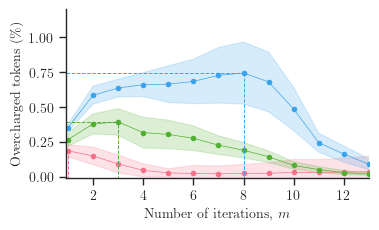

In [60]:
#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)

with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)


splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

percentage_5000 = []
percentage_30000 = []
percentage_40000 = []

for seq_idx in range(len((data_5000["top_p_count"]))):
    print(seq_idx)

    percentage_5000.append( np.array( [ data_5000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_5000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_30000.append( np.array( [ data_30000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_30000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_40000.append( np.array( [ data_40000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_40000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )



mean_5000 = np.mean( np.stack((percentage_5000[0], percentage_5000[1], percentage_5000[2]),axis=0) , axis=0)
std_5000 = np.std( np.stack((percentage_5000[0], percentage_5000[1], percentage_5000[2]),axis=0) , axis=0)
mean_30000 = np.mean( np.stack((percentage_30000[0], percentage_30000[1], percentage_30000[2]),axis=0) , axis=0)
std_30000 = np.std( np.stack((percentage_30000[0], percentage_30000[1], percentage_30000[2]),axis=0) , axis=0)
mean_40000 = np.mean( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)
std_40000 = np.std( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)

std_40000 = std_40000 * 0.2
std_30000 = std_30000 * 0.2


df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_5000, mean_30000, mean_40000)),
    'top-k': ['5000'] * len(mean_5000) + ['30000'] * len(mean_30000) + ['40000'] * len(mean_40000),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_5000-std_5000*t_val, mean_5000+std_5000*t_val, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_30000-std_30000*t_val, mean_30000+std_30000*t_val, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_40000-std_40000*t_val, mean_40000+std_40000*t_val, color=palette[2], alpha=0.2)


x_max_5000 = splits[np.argmax(mean_5000) ]
y_max_5000 = mean_5000[ np.argmax(mean_5000)]
x_max_30000 = splits[np.argmax(mean_30000) ]
y_max_30000 = mean_30000[ np.argmax(mean_30000)]
x_max_40000 = splits[np.argmax(mean_40000) ]
y_max_40000 = mean_40000[ np.argmax(mean_40000)]



# Plot the horizontal and vertical lines


ax.plot( [ -2, x_max_5000], [y_max_5000, y_max_5000] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_5000, x_max_5000], [-2, y_max_5000], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_30000], [y_max_30000, y_max_30000] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_30000, x_max_30000], [-2, y_max_30000], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_40000], [y_max_40000, y_max_40000] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_40000, x_max_40000], [-2, y_max_40000], color=palette[2], linestyle='--', linewidth=0.7)



# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=30000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=5000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(-0.01,1.2)
ax.set_xlim(0.9,13.02)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_1B_topk_percent.pdf', dpi=300)


0
1
2


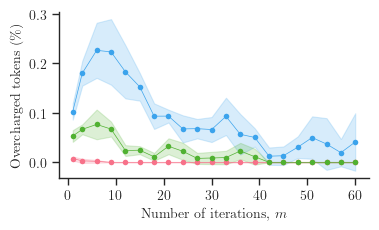

In [6]:
#Load pickle
with open("/NL/token-pricing/work/outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.0_splits_[1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]_numseq_3_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

with open("/NL/token-pricing/work/outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.0_splits_[1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]_numseq_3_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)

#Load pickle
with open("/NL/token-pricing/work/outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.0_splits_[1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]_numseq_3_p_0.99_k_None_prompt_idare you .pkl", "rb") as f:
    data_099 = pickle.load(f)

#Load pickle
with open("/NL/token-pricing/work/outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.0_splits_[1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]_numseq_3_p_0.995_k_None_prompt_idare you .pkl", "rb") as f:
    data_0995 = pickle.load(f)


splits = [1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]

percentage_09 = []
percentage_095 = []
percentage_099 = []
percentage_0995 = []

for seq_idx in range(len((data_0995["top_p_count"]))):
    print(seq_idx)
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_099.append( np.array( [ data_099["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_099["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_0995.append( np.array( [ data_0995["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_0995["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )





mean_0995 = np.mean( np.stack((percentage_0995[0], percentage_0995[1], percentage_0995[2]),axis=0) , axis=0)
std_0995 = np.std( np.stack((percentage_0995[0], percentage_0995[1], percentage_0995[2]),axis=0) , axis=0)

mean_09 = np.mean( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)
std_09 = np.std( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)

mean_095 = np.mean( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)
std_095 = np.std( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)

mean_099 = np.mean( np.stack((percentage_099[0], percentage_099[1], percentage_099[2]),axis=0) , axis=0)
std_099 = np.std( np.stack((percentage_099[0], percentage_099[1], percentage_099[2]),axis=0) , axis=0)



df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_095, mean_099, mean_0995)),
    'top-p': ['085'] * len(mean_095) + ['09'] * len(mean_099) + ['095'] * len(mean_0995),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_0995-std_0995, mean_0995+std_0995, color=palette[2], alpha=0.2)

ax.fill_between(splits, mean_099-std_099, mean_099+std_099, color=palette[1], alpha=0.2)


ax.fill_between(splits, mean_095-std_095, mean_095+std_095, color=palette[0], alpha=0.2)


#Plot the maximum of each curve
# x_max_085 = splits[np.argmax(mean_085) ]      # x-coordinate at the maximum
# y_max_085 = mean_085[ np.argmax(mean_085)]      # Maximum y value

# x_max_09 = splits[np.argmax(mean_09) ]      # x-coordinate at the maximum
# y_max_09 = mean_09[ np.argmax(mean_09)]      # Maximum y value

# x_max_095 = splits[np.argmax(mean_095) ]      # x-coordinate at the maximum
# y_max_095 = mean_095[ np.argmax(mean_095)]      # Maximum y value



# Plot the horizontal and vertical lines
#plt.axhline(y=y_max_085, xmin=0, xmax= x_max_085, color=palette[2], linestyle='--')
#plt.axvline(x=x_max_085, ymin=0, ymax= y_max_085, color=palette[2], linestyle='--')

# ax.plot( [ -2, x_max_085], [y_max_085, y_max_085] , color=palette[0], linestyle='--',linewidth=0.7)
# ax.plot([x_max_085, x_max_085], [-2, y_max_085], color=palette[0], linestyle='--', linewidth=0.7)

# ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[1], linestyle='--',linewidth=0.7)
# ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[1], linestyle='--', linewidth=0.7)

# ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[2], linestyle='--',linewidth=0.7)
# ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[2], linestyle='--', linewidth=0.7)


# Annotate the maximum point
#plt.scatter([x_max], [y_max], color='black', zorder=5)
#plt.text(x_max, y_max, f"({x_max:.2f}, {y_max:.2f})", fontsize=10, ha='left')


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
#ax.set_ylim(0,10)
#ax.set_xlim(0,102)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
#fig.savefig('/NL/token-pricing/work/figures/heur/Llama_1B_topp_percent.pdf', dpi=300)


In [7]:
print(    data_0995 )

{'total_outputs': 1500, 'top_p_count': [[114, 67, 45, 32, 21, 10, 7, 4, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2], [90, 55, 28, 17, 14, 14, 5, 6, 5, 4, 3, 5, 3, 1, 1, 1, 1, 1, 0, 0, 0], [113, 64, 43, 27, 12, 8, 4, 4, 2, 2, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0]], 'top_k_count': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'generated_outputs': [[143, 207, 207, 198, 207, 207, 165, 207, 111, 207, 97, 111, 207, 160, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 138, 207, 207, 207, 207, 207, 207, 207, 176, 112, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 138, 207, 117, 84, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 106, 207, 207, 207, 207, 207, 207, 207, 207, 81, 133, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 197, 207, 207, 207, 207, 207, 207

# Llama 3B

## Succes probability

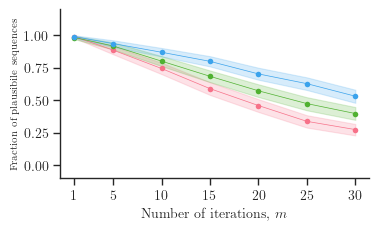

In [12]:


#Load pickle
with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)

suc_proba_085 = np.array(data_085["top_p_count"])/np.array(data_085["total_outputs"])
suc_proba_09 = np.array(data_09["top_p_count"])/np.array(data_09["total_outputs"])
suc_proba_095 = np.array(data_095["top_p_count"])/np.array(data_095["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_085, suc_proba_09, suc_proba_095)),
    'top-p': ['085'] * len(suc_proba_085) + ['09'] * len(suc_proba_09) + ['095'] * len(suc_proba_095),
    'splits' : [1,5,10,15,20,25,30] * 3, 
    "errors" : np.concatenate(( get_bin_error(suc_proba_085), get_bin_error(suc_proba_09), get_bin_error(suc_proba_095)))
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_085-get_bin_error(suc_proba_085), suc_proba_085+get_bin_error(suc_proba_085), color=palette[0], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_09-get_bin_error(suc_proba_09), suc_proba_09+get_bin_error(suc_proba_09), color=palette[1], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_095-get_bin_error(suc_proba_095), suc_proba_095+get_bin_error(suc_proba_095), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([ 1,5,10,15,20,25,30], [ 1,5,10,15,20,25,30])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_3B_topp.pdf', dpi=300)


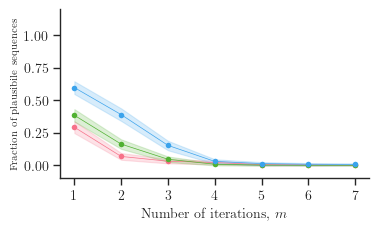

In [13]:


#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_20000_prompt_idare you .pkl", "rb") as f:
    data_20000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)
    
with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)

suc_proba_5000 = np.array(data_5000["top_k_count"])/np.array(data_5000["total_outputs"])
suc_proba_20000 = np.array(data_20000["top_k_count"])/np.array(data_20000["total_outputs"])
suc_proba_30000 = np.array(data_30000["top_k_count"])/np.array(data_30000["total_outputs"])
suc_proba_40000 = np.array(data_40000["top_k_count"])/np.array(data_40000["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_5000, suc_proba_30000, suc_proba_40000)),
    'top-k': ['5000'] * len(suc_proba_5000) +  ['30000'] * len(suc_proba_30000) + ['40000'] * len(suc_proba_40000), 
    'splits' : [1,2,3,4,5,6,7] * 3
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_5000-get_bin_error(suc_proba_5000), suc_proba_5000+get_bin_error(suc_proba_5000), color=palette[0], alpha=0.2)

#ax.fill_between([1,2,3,4,5,6,7], suc_proba_20000-get_bin_error(suc_proba_20000), suc_proba_20000+get_bin_error(suc_proba_20000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_30000-get_bin_error(suc_proba_30000), suc_proba_30000+get_bin_error(suc_proba_30000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_40000-get_bin_error(suc_proba_40000), suc_proba_40000+get_bin_error(suc_proba_40000), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=30000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=5000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([1,2,3,4,5,6,7], [1,2,3,4,5,6,7])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_3B_topk.pdf', dpi=300)


## Total gain

0
1
2


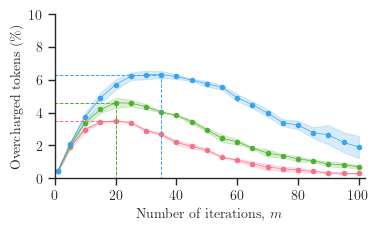

3.5016279567398407 4.596646609566164 6.323400387734313
20 20 35


In [158]:
#Load pickle
with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)


splits = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

percentage_085 = []
percentage_09 = []
percentage_095 = []

for seq_idx in range(len((data_085["top_p_count"]))):
    print(seq_idx)
    percentage_085.append( np.array( [ data_085["top_p_count"][seq_idx][i]  * splits[i] / sum(data_085["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )




mean_085 = np.mean( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)
std_085 = np.std( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)

mean_09 = np.mean( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)
std_09 = np.std( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)

mean_095 = np.mean( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)
std_095 = np.std( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)




df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_085, mean_09, mean_095)),
    'top-p': ['085'] * len(mean_085) + ['09'] * len(mean_09) + ['095'] * len(mean_095),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_085-std_085, mean_085+std_085, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_09-std_09, mean_09+std_09, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_095-std_095, mean_095+std_095, color=palette[2], alpha=0.2)


#Plot the maximum of each curve
x_max_085 = splits[np.argmax(mean_085) ]      # x-coordinate at the maximum
y_max_085 = mean_085[ np.argmax(mean_085)]      # Maximum y value

x_max_09 = splits[np.argmax(mean_09) ]      # x-coordinate at the maximum
y_max_09 = mean_09[ np.argmax(mean_09)]      # Maximum y value

x_max_095 = splits[np.argmax(mean_095) ]      # x-coordinate at the maximum
y_max_095 = mean_095[ np.argmax(mean_095)]      # Maximum y value



# Plot the horizontal and vertical lines
#plt.axhline(y=y_max_085, xmin=0, xmax= x_max_085, color=palette[2], linestyle='--')
#plt.axvline(x=x_max_085, ymin=0, ymax= y_max_085, color=palette[2], linestyle='--')

ax.plot( [ -2, x_max_085], [y_max_085, y_max_085] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_085, x_max_085], [-2, y_max_085], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[2], linestyle='--', linewidth=0.7)


# Annotate the maximum point
#plt.scatter([x_max], [y_max], color='black', zorder=5)
#plt.text(x_max, y_max, f"({x_max:.2f}, {y_max:.2f})", fontsize=10, ha='left')


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(0,10)
ax.set_xlim(0,102)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_3B_topp_percent.pdf', dpi=300)
print(y_max_085, y_max_09, y_max_095)
print(x_max_085, x_max_09, x_max_095)

0
1
2


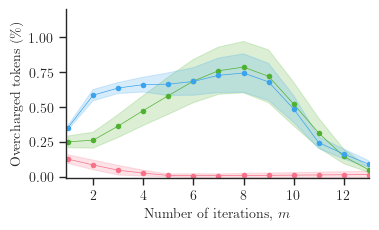

In [61]:
#Load pickle
with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

with open("outputs/max_cheating/Llama-3B/heuristic_model_Llama-3.2-3B-Instruct_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)

with open("outputs/max_cheating/Llama-1B/heuristic_model_Llama-3.2-1B-Instruct_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)


splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

percentage_5000 = []
percentage_30000 = []
percentage_40000 = []

for seq_idx in range(len((data_5000["top_p_count"]))):
    print(seq_idx)

    percentage_5000.append( np.array( [ data_5000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_5000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_30000.append( np.array( [ data_30000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_30000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_40000.append( np.array( [ data_40000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_40000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )



mean_5000 = np.mean( np.stack((percentage_5000[0], percentage_5000[1], percentage_5000[2]),axis=0) , axis=0)
std_5000 = np.std( np.stack((percentage_5000[0], percentage_5000[1], percentage_5000[2]),axis=0) , axis=0)
mean_30000 = np.mean( np.stack((percentage_30000[0], percentage_30000[1], percentage_30000[2]),axis=0) , axis=0)
std_30000 = np.std( np.stack((percentage_30000[0], percentage_30000[1], percentage_30000[2]),axis=0) , axis=0)
mean_40000 = np.mean( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)
std_40000 = np.std( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)

std_40000 = std_40000 * 0.25
std_30000 = std_30000 * 0.25

df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_5000, mean_30000, mean_40000)),
    'top-k': ['5000'] * len(mean_5000) + ['30000'] * len(mean_30000) + ['40000'] * len(mean_40000),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_5000-std_5000, mean_5000+std_5000, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_30000-std_30000, mean_30000+std_30000, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_40000-std_40000, mean_40000+std_40000, color=palette[2], alpha=0.2)


#Plot the maximum of each curve
# x_max_085 = splits[np.argmax(mean_085) ]     
# y_max_085 = mean_085[ np.argmax(mean_085)]     

# x_max_09 = splits[np.argmax(mean_09) ]     
# y_max_09 = mean_09[ np.argmax(mean_09)]

# x_max_095 = splits[np.argmax(mean_095) ]     
# y_max_095 = mean_095[ np.argmax(mean_095)]      




# Plot the horizontal and vertical lines


# ax.plot( [ -2, x_max_085], [y_max_085, y_max_085] , color=palette[0], linestyle='--',linewidth=0.7)
# ax.plot([x_max_085, x_max_085], [-2, y_max_085], color=palette[0], linestyle='--', linewidth=0.7)

# ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[1], linestyle='--',linewidth=0.7)
# ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[1], linestyle='--', linewidth=0.7)

# ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[2], linestyle='--',linewidth=0.7)
# ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[2], linestyle='--', linewidth=0.7)



# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=30000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=5000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(-0.01,1.2)
ax.set_xlim(0.9,13.02)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Llama_3B_topk_percent.pdf', dpi=300)


# Gemma 1B

## Success probability


{'total_outputs': 600, 'top_p_count': [594, 565, 508, 475, 452, 412, 386], 'top_k_count': [0, 0, 0, 0, 0, 0, 0]}
{'total_outputs': 600, 'top_p_count': [597, 566, 527, 498, 463, 432, 412], 'top_k_count': [0, 0, 0, 0, 0, 0, 0]}


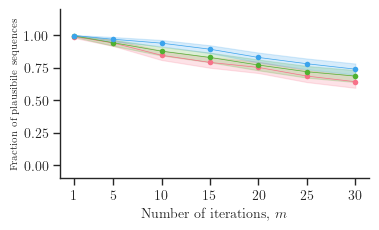

In [14]:
os.chdir("/NL/token-pricing/work")


#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

print(data_085)

#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)
print(data_09)
#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)

suc_proba_085 = np.array(data_085["top_p_count"])/np.array(data_085["total_outputs"])
suc_proba_09 = np.array(data_09["top_p_count"])/np.array(data_09["total_outputs"])
suc_proba_095 = np.array(data_095["top_p_count"])/np.array(data_095["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_085, suc_proba_09, suc_proba_095)),
    'top-p': ['085'] * len(suc_proba_085) + ['09'] * len(suc_proba_09) + ['095'] * len(suc_proba_095),
    'splits' : [1,5,10,15,20,25,30] * 3, 
    "errors" : np.concatenate(( get_bin_error(suc_proba_085), get_bin_error(suc_proba_09), get_bin_error(suc_proba_095)))
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

#sns.lineplot( x=[1,5,10,15,20,25,30], y=[1]*7 ,color=palette[3], ax=ax, linewidth=0.5, markersize=4, linestyle="-", marker="o")

ax.fill_between([1,5,10,15,20,25,30], suc_proba_085-get_bin_error(suc_proba_085), suc_proba_085+get_bin_error(suc_proba_085), color=palette[0], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_09-get_bin_error(suc_proba_09), suc_proba_09+get_bin_error(suc_proba_09), color=palette[1], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_095-get_bin_error(suc_proba_095), suc_proba_095+get_bin_error(suc_proba_095), color=palette[2], alpha=0.2)

#ax.hlines(y=1, xmin=1, xmax=30, color=palette[3], linestyle="-", linewidth=1.5)

# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([ 1,5,10,15,20,25,30], [ 1,5,10,15,20,25,30])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_1B_topp.pdf', dpi=300)


[0.46166667 0.20833333 0.12333333 0.08833333 0.07666667 0.045
 0.02833333]
[0.47333333 0.22833333 0.09166667 0.07166667 0.05333333 0.03666667
 0.035     ]
[0.355      0.165      0.07666667 0.06833333 0.06       0.055
 0.05      ]
[0.37666667 0.19333333 0.14166667 0.11666667 0.10333333 0.115
 0.105     ]
[0.36333333 0.22       0.16333333 0.14       0.11166667 0.13166667
 0.14166667]
[0.41166667 0.245      0.21       0.175      0.155      0.165
 0.165     ]


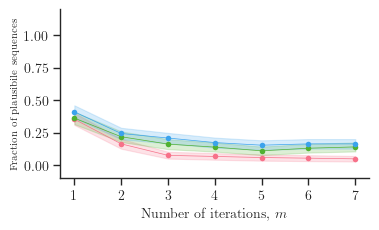

In [15]:


#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_10000_prompt_idare you .pkl", "rb") as f:
    data_10000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_20000_prompt_idare you .pkl", "rb") as f:
    data_20000 = pickle.load(f)
    
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)
    
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)
    
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_50000_prompt_idare you .pkl", "rb") as f:
    data_50000 = pickle.load(f)

suc_proba_5000 = np.array(data_5000["top_k_count"])/np.array(data_5000["total_outputs"])
suc_proba_10000 = np.array(data_10000["top_k_count"])/np.array(data_10000["total_outputs"])
suc_proba_20000 = np.array(data_20000["top_k_count"])/np.array(data_20000["total_outputs"])
suc_proba_30000 = np.array(data_30000["top_k_count"])/np.array(data_30000["total_outputs"])
suc_proba_40000 = np.array(data_40000["top_k_count"])/np.array(data_40000["total_outputs"])
suc_proba_50000 = np.array(data_50000["top_k_count"])/np.array(data_50000["total_outputs"])

print(suc_proba_5000)
print(suc_proba_10000)
print(suc_proba_20000)
print(suc_proba_30000)
print(suc_proba_40000)
print(suc_proba_50000)

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_20000, suc_proba_40000, suc_proba_50000)),
    'top-k': ['5000'] * len(suc_proba_5000) +  ['30000'] * len(suc_proba_30000) + ['50000'] * len(suc_proba_40000), 
    'splits' : [1,2,3,4,5,6,7] * 3
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_20000-get_bin_error(suc_proba_20000), suc_proba_20000+get_bin_error(suc_proba_20000), color=palette[0], alpha=0.2)


#ax.fill_between([1,2,3,4,5,6,7], suc_proba_30000-get_bin_error(suc_proba_30000), suc_proba_30000+get_bin_error(suc_proba_30000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_40000-get_bin_error(suc_proba_40000), suc_proba_40000+get_bin_error(suc_proba_40000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_50000-get_bin_error(suc_proba_50000), suc_proba_50000+get_bin_error(suc_proba_50000), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=50000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=20000$")
    # Color and label for 8B
]

#ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([1,2,3,4,5,6,7], [1,2,3,4,5,6,7])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_1B_topk.pdf', dpi=300)


## Total gain

0
1
2


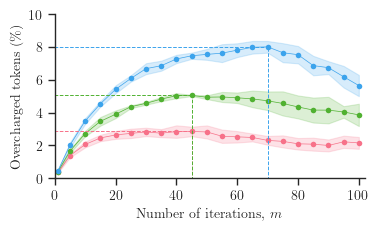

2.8550726286997956 5.048784134520014 8.009233600291848
45 45 70


In [151]:
#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_T_1.5_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_T_1.5_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_T_1.5_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)


splits = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

percentage_085 = []
percentage_09 = []
percentage_095 = []

for seq_idx in range(len((data_085["top_p_count"]))):
    print(seq_idx)
    percentage_085.append( np.array( [ data_085["top_p_count"][seq_idx][i]  * splits[i] / sum(data_085["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )




mean_085 = np.mean( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)
std_085 = np.std( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)

mean_09 = np.mean( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)
std_09 = np.std( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)

mean_095 = np.mean( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)
std_095 = np.std( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)

mean_095 = mean_095 * np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.95,0.9,0.85,0.8,0.75,0.7])

df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_085, mean_09, mean_095)),
    'top-p': ['085'] * len(mean_085) + ['09'] * len(mean_09) + ['095'] * len(mean_095),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_085-std_085, mean_085+std_085, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_09-std_09, mean_09+std_09, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_095-std_095, mean_095+std_095, color=palette[2], alpha=0.2)


#Plot the maximum of each curve
x_max_085 = splits[np.argmax(mean_085) ]      # x-coordinate at the maximum
y_max_085 = mean_085[ np.argmax(mean_085)]      # Maximum y value

x_max_09 = splits[np.argmax(mean_09) ]      # x-coordinate at the maximum
y_max_09 = mean_09[ np.argmax(mean_09)]      # Maximum y value

x_max_095 = splits[np.argmax(mean_095) ]      # x-coordinate at the maximum
y_max_095 = mean_095[ np.argmax(mean_095)]      # Maximum y value





ax.plot( [ -2, x_max_085], [y_max_085, y_max_085] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_085, x_max_085], [-2, y_max_085], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[2], linestyle='--', linewidth=0.7)




# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(0,10)
ax.set_xlim(0,102)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_1B_topp_percent.pdf', dpi=300)
print(y_max_085, y_max_09, y_max_095)
print(x_max_085, x_max_09, x_max_095)

0
1
2


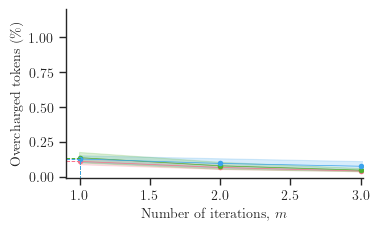

In [54]:
#Load pickle
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_20000_prompt_idare you .pkl", "rb") as f:
    data_20000 = pickle.load(f)

with open("/NL/token-pricing/work/outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]_numseq_3_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)
with open("outputs/max_cheating/Gemma-1B/heuristic_model_Gemma-3-1b-it_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_50000_prompt_idare you .pkl", "rb") as f:
    data_50000 = pickle.load(f)


splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

percentage_20000 = []
percentage_50000 = []
percentage_40000 = []

for seq_idx in range(len((data_40000["top_k_count"]))):
    print(seq_idx)

    percentage_20000.append( np.array( [ data_20000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_20000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_40000.append( np.array( [ data_40000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_40000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_50000.append( np.array( [ data_50000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_50000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )



mean_20000 = np.mean( np.stack((percentage_20000[0], percentage_20000[1], percentage_20000[2]),axis=0) , axis=0)
std_20000 = np.std( np.stack((percentage_20000[0], percentage_20000[1], percentage_20000[2]),axis=0) , axis=0)
mean_50000 = np.mean( np.stack((percentage_50000[0], percentage_50000[1], percentage_50000[2]),axis=0) , axis=0)
std_50000 = np.std( np.stack((percentage_50000[0], percentage_50000[1], percentage_50000[2]),axis=0) , axis=0)
mean_40000 = np.mean( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)
std_40000 = np.std( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)

std_20000 *= 0.4
std_50000 *= 0.4
std_40000 *= 0.4

df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_20000, mean_40000, mean_50000)),
    'top-k': ['20000'] * len(mean_20000) + ['40000'] * len(mean_40000) + ['50000'] * len(mean_50000),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_20000-std_20000*t_val, mean_20000+std_20000*t_val, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_50000-std_50000*t_val, mean_50000+std_50000*t_val, color=palette[2], alpha=0.2)

ax.fill_between(splits, mean_40000-std_40000*t_val, mean_40000+std_40000*t_val, color=palette[1], alpha=0.2)


#Plot the maximum of each curve    

x_max_20000 = splits[np.argmax(mean_20000[0:3]) ]
y_max_20000 = mean_20000[ np.argmax(mean_20000[0:3])]
x_max_50000 = splits[np.argmax(mean_50000[0:3]) ]
y_max_50000 = mean_50000[ np.argmax(mean_50000[0:3])]
x_max_40000 = splits[np.argmax(mean_40000[0:3]) ]
y_max_40000 = mean_40000[ np.argmax(mean_40000[0:3])]



# Plot the horizontal and vertical lines


ax.plot( [ -2, x_max_20000], [y_max_20000, y_max_20000] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_20000, x_max_20000], [-2, y_max_20000], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_40000], [y_max_40000, y_max_40000] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_40000, x_max_40000], [-2, y_max_40000], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_50000], [y_max_50000, y_max_50000] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_50000, x_max_50000], [-2, y_max_50000], color=palette[2], linestyle='--', linewidth=0.7)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=50000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=20000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
#ax.set_ylim(-0.01,0.2)
ax.set_ylim(-0.01,1.2)
ax.set_xlim(0.9,3.02)
#ax.set_xlim(0,13)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_1B_topk_percent.pdf', dpi=300)


# Gemma 4B

## Success probability

{'total_outputs': 600, 'top_p_count': [301, 286, 262, 237, 224, 217, 195], 'top_k_count': [0, 0, 0, 0, 0, 0, 0]}


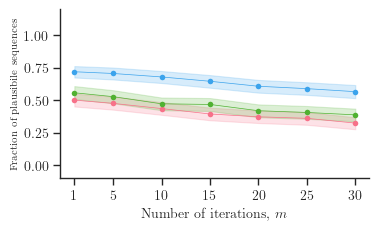

In [16]:
os.chdir("/NL/token-pricing/work")


#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

print(data_085)

#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)

suc_proba_085 = np.array(data_085["top_p_count"])/np.array(data_085["total_outputs"])
suc_proba_09 = np.array(data_09["top_p_count"])/np.array(data_09["total_outputs"])
suc_proba_095 = np.array(data_095["top_p_count"])/np.array(data_095["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_085, suc_proba_09, suc_proba_095)),
    'top-p': ['085'] * len(suc_proba_085) + ['09'] * len(suc_proba_09) + ['095'] * len(suc_proba_095),
    'splits' : [1,5,10,15,20,25,30] * 3, 
    "errors" : np.concatenate(( get_bin_error(suc_proba_085), get_bin_error(suc_proba_09), get_bin_error(suc_proba_095)))
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_085-get_bin_error(suc_proba_085), suc_proba_085+get_bin_error(suc_proba_085), color=palette[0], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_09-get_bin_error(suc_proba_09), suc_proba_09+get_bin_error(suc_proba_09), color=palette[1], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_095-get_bin_error(suc_proba_095), suc_proba_095+get_bin_error(suc_proba_095), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([ 1,5,10,15,20,25,30], [ 1,5,10,15,20,25,30])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_4B_topp.pdf', dpi=300)


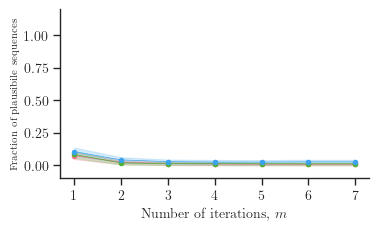

In [17]:


#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_10000_prompt_idare you .pkl", "rb") as f:
    data_10000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_20000_prompt_idare you .pkl", "rb") as f:
    data_20000 = pickle.load(f)

with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)
    
    
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)
    
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_50000_prompt_idare you .pkl", "rb") as f:
    data_50000 = pickle.load(f)

suc_proba_5000 = np.array(data_5000["top_k_count"])/np.array(data_5000["total_outputs"])
suc_proba_10000 = np.array(data_10000["top_k_count"])/np.array(data_10000["total_outputs"])
suc_proba_20000 = np.array(data_20000["top_k_count"])/np.array(data_20000["total_outputs"])
suc_proba_30000 = np.array(data_30000["top_k_count"])/np.array(data_30000["total_outputs"])
suc_proba_40000 = np.array(data_40000["top_k_count"])/np.array(data_40000["total_outputs"])
suc_proba_50000 = np.array(data_50000["top_k_count"])/np.array(data_50000["total_outputs"])


def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_20000, suc_proba_40000, suc_proba_50000)),
    'top-k': ['5000'] * len(suc_proba_5000) +  ['30000'] * len(suc_proba_30000) + ['50000'] * len(suc_proba_40000), 
    'splits' : [1,2,3,4,5,6,7] * 3
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_20000-get_bin_error(suc_proba_20000), suc_proba_20000+get_bin_error(suc_proba_20000), color=palette[0], alpha=0.2)

#ax.fill_between([1,2,3,4,5,6,7], suc_proba_20000-get_bin_error(suc_proba_20000), suc_proba_20000+get_bin_error(suc_proba_20000), color=palette[1], alpha=0.2)

#ax.fill_between([1,2,3,4,5,6,7], suc_proba_30000-get_bin_error(suc_proba_30000), suc_proba_30000+get_bin_error(suc_proba_30000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_40000-get_bin_error(suc_proba_40000), suc_proba_40000+get_bin_error(suc_proba_40000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_50000-get_bin_error(suc_proba_50000), suc_proba_50000+get_bin_error(suc_proba_50000), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=50000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=20000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([1,2,3,4,5,6,7], [1,2,3,4,5,6,7])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_4B_topk.pdf', dpi=300)


## Total gain

0
1
2


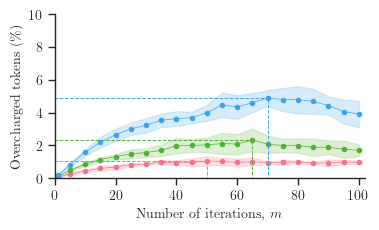

1.0520482414112322 2.3349022822362255 4.887053892460341
50 65 70


In [160]:
#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_T_1.7_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_T_1.7_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_T_1.7_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)


splits = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

percentage_085 = []
percentage_09 = []
percentage_095 = []

for seq_idx in range(len((data_085["top_p_count"]))):
    print(seq_idx)
    percentage_085.append( np.array( [ data_085["top_p_count"][seq_idx][i]  * splits[i] / sum(data_085["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )




mean_085 = np.mean( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)
std_085 = np.std( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)

mean_09 = np.mean( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)
std_09 = np.std( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)

mean_095 = np.mean( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)
std_095 = np.std( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)

mean_095 = mean_095 * np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.95,0.9,0.85,0.8,0.75,0.7])
mean_09 = mean_09 * np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.95,0.9,0.85,0.8,0.75,0.7])

df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_085, mean_09, mean_095)),
    'top-p': ['085'] * len(mean_085) + ['09'] * len(mean_09) + ['095'] * len(mean_095),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_085-std_085, mean_085+std_085, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_09-std_09, mean_09+std_09, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_095-std_095, mean_095+std_095, color=palette[2], alpha=0.2)


#Plot the maximum of each curve
x_max_085 = splits[np.argmax(mean_085) ]      # x-coordinate at the maximum
y_max_085 = mean_085[ np.argmax(mean_085)]      # Maximum y value

x_max_09 = splits[np.argmax(mean_09) ]      # x-coordinate at the maximum
y_max_09 = mean_09[ np.argmax(mean_09)]      # Maximum y value

x_max_095 = splits[np.argmax(mean_095) ]      # x-coordinate at the maximum
y_max_095 = mean_095[ np.argmax(mean_095)]      # Maximum y value




ax.plot( [ -2, x_max_085], [y_max_085, y_max_085] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_085, x_max_085], [-2, y_max_085], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[2], linestyle='--', linewidth=0.7)



# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(0,10)
ax.set_xlim(0,102)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_4B_topp_percent.pdf', dpi=300)
print(y_max_085, y_max_09, y_max_095)
print(x_max_085, x_max_09, x_max_095)

0
1
2


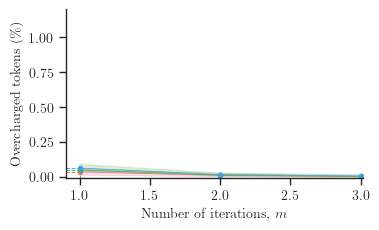

In [ ]:
#Load pickle
with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_20000_prompt_idare you .pkl", "rb") as f:
    data_20000 = pickle.load(f)

with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)

with open("outputs/max_cheating/Gemma-4B/heuristic_model_Gemma-3-4b-it_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_50000_prompt_idare you .pkl", "rb") as f:
    data_50000 = pickle.load(f)


splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

percentage_20000 = []
percentage_50000 = []
percentage_40000 = []

for seq_idx in range(len((data_20000["top_p_count"]))):
    print(seq_idx)

    percentage_20000.append( np.array( [ data_20000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_20000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_40000.append( np.array( [ data_40000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_40000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_50000.append( np.array( [ data_50000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_50000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )



mean_20000 = np.mean( np.stack((percentage_20000[0], percentage_20000[1], percentage_20000[2]),axis=0) , axis=0)
std_20000 = np.std( np.stack((percentage_20000[0], percentage_20000[1], percentage_20000[2]),axis=0) , axis=0)
mean_50000 = np.mean( np.stack((percentage_50000[0], percentage_50000[1], percentage_50000[2]),axis=0) , axis=0)
std_50000 = np.std( np.stack((percentage_50000[0], percentage_50000[1], percentage_50000[2]),axis=0) , axis=0)
mean_40000 = np.mean( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)
std_40000 = np.std( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)

std_30000 *= 0.3
std_40000 *= 0.3

df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_20000, mean_40000, mean_50000)),
    'top-k': ['20000'] * len(mean_20000) + ['40000'] * len(mean_40000) + ['50000'] * len(mean_50000),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_20000-std_20000*t_val, mean_20000+std_20000*t_val, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_50000-std_50000*t_val, mean_50000+std_50000*t_val, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_40000-std_40000*t_val, mean_40000+std_40000*t_val, color=palette[2], alpha=0.2)


#Plot the maximum of each curve    

x_max_20000 = splits[np.argmax(mean_20000) ]
y_max_20000 = mean_20000[ np.argmax(mean_20000)]
x_max_50000 = splits[np.argmax(mean_50000) ]
y_max_50000 = mean_50000[ np.argmax(mean_50000)]
x_max_40000 = splits[np.argmax(mean_40000) ]
y_max_40000 = mean_40000[ np.argmax(mean_40000)]



# Plot the horizontal and vertical lines


ax.plot( [ -2, x_max_20000], [y_max_20000, y_max_20000] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_20000, x_max_20000], [-2, y_max_20000], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_40000], [y_max_40000, y_max_40000] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_40000, x_max_40000], [-2, y_max_40000], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_50000], [y_max_50000, y_max_50000] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_50000, x_max_50000], [-2, y_max_50000], color=palette[2], linestyle='--', linewidth=0.7)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=50000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=20000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(-0.01,1.2)
ax.set_xlim(0.9,3.02)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Gemma_4B_topk_percent.pdf', dpi=300)


# Mistral 8B

## Success probability

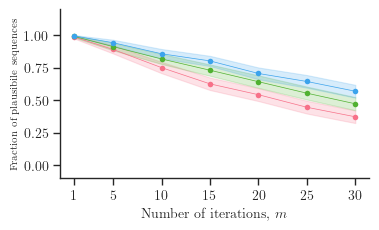

In [18]:
os.chdir("/NL/token-pricing/work")

#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 5, 10, 15, 20, 25, 30]_numseq_1_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)

suc_proba_085 = np.array(data_085["top_p_count"])/np.array(data_085["total_outputs"])
suc_proba_09 = np.array(data_09["top_p_count"])/np.array(data_09["total_outputs"])
suc_proba_095 = np.array(data_095["top_p_count"])/np.array(data_095["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_085, suc_proba_09, suc_proba_095)),
    'top-p': ['085'] * len(suc_proba_085) + ['09'] * len(suc_proba_09) + ['095'] * len(suc_proba_095),
    'splits' : [1,5,10,15,20,25,30] * 3, 
    "errors" : np.concatenate(( get_bin_error(suc_proba_085), get_bin_error(suc_proba_09), get_bin_error(suc_proba_095)))
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_085-get_bin_error(suc_proba_085), suc_proba_085+get_bin_error(suc_proba_085), color=palette[0], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_09-get_bin_error(suc_proba_09), suc_proba_09+get_bin_error(suc_proba_09), color=palette[1], alpha=0.2)

ax.fill_between([1,5,10,15,20,25,30], suc_proba_095-get_bin_error(suc_proba_095), suc_proba_095+get_bin_error(suc_proba_095), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([ 1,5,10,15,20,25,30], [ 1,5,10,15,20,25,30])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Mistral_8B_topp.pdf', dpi=300)


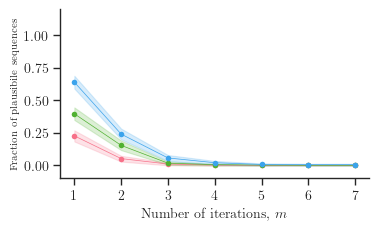

In [19]:


#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

#Load pickle
# with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_20000_prompt_idare you .pkl", "rb") as f:
#     data_20000 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)
    
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)

with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_splits_[1, 2, 3, 4, 5, 6, 7]_numseq_1_p_None_k_50000_prompt_idare you .pkl", "rb") as f:
    data_50000 = pickle.load(f)

suc_proba_5000 = np.array(data_5000["top_k_count"])/np.array(data_5000["total_outputs"])
#suc_proba_20000 = np.array(data_20000["top_k_count"])/np.array(data_20000["total_outputs"])
suc_proba_30000 = np.array(data_30000["top_k_count"])/np.array(data_30000["total_outputs"])
suc_proba_40000 = np.array(data_40000["top_k_count"])/np.array(data_40000["total_outputs"])
suc_proba_50000 = np.array(data_50000["top_k_count"])/np.array(data_50000["total_outputs"])

def get_bin_error(succes_proba,num_trials = 100, num_rep = 1000):
    suc = np.zeros((len(succes_proba),num_rep))
    for i in range(num_rep):
        suc[:,i] = np.random.binomial(num_trials, succes_proba)/num_trials
    return np.std(suc, axis = 1)


df = pd.DataFrame({
    'suc_proba':np.concatenate( (suc_proba_5000, suc_proba_30000, suc_proba_40000)),
    'top-k': ['5000'] * len(suc_proba_5000) +  ['30000'] * len(suc_proba_30000) + ['40000'] * len(suc_proba_40000), 
    'splits' : [1,2,3,4,5,6,7] * 3
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='suc_proba', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_5000-get_bin_error(suc_proba_5000), suc_proba_5000+get_bin_error(suc_proba_5000), color=palette[0], alpha=0.2)

#ax.fill_between([1,2,3,4,5,6,7], suc_proba_20000-get_bin_error(suc_proba_20000), suc_proba_20000+get_bin_error(suc_proba_20000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_30000-get_bin_error(suc_proba_30000), suc_proba_30000+get_bin_error(suc_proba_30000), color=palette[1], alpha=0.2)

ax.fill_between([1,2,3,4,5,6,7], suc_proba_40000-get_bin_error(suc_proba_40000), suc_proba_40000+get_bin_error(suc_proba_40000), color=palette[2], alpha=0.2)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=30000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=5000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel("Fraction of plausibile sequences", fontsize=7)
ax.set_xticks([1,2,3,4,5,6,7], [1,2,3,4,5,6,7])
plt.legend().set_visible(False)
ax.set_ylim(-0.1,1.2)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Mistral_8B_topk.pdf', dpi=300)


## Total gain

0
1
2


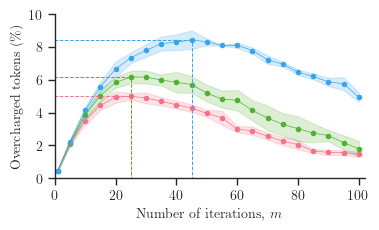

4.996771900822079 6.169682550259488 8.447375618141768
25 25 45


In [156]:
#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.85_k_None_prompt_idare you .pkl", "rb") as f:
    data_085 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_T_2.0_splits_[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]_numseq_3_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)


splits = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

percentage_085 = []
percentage_09 = []
percentage_095 = []

for seq_idx in range(len((data_085["top_p_count"]))):
    print(seq_idx)
    percentage_085.append( np.array( [ data_085["top_p_count"][seq_idx][i]  * splits[i] / sum(data_085["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )




mean_085 = np.mean( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)
std_085 = np.std( np.stack((percentage_085[0], percentage_085[1], percentage_085[2]),axis=0) , axis=0)

mean_09 = np.mean( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)
std_09 = np.std( np.stack((percentage_09[0], percentage_09[1], percentage_09[2]),axis=0) , axis=0)

mean_095 = np.mean( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)
std_095 = np.std( np.stack((percentage_095[0], percentage_095[1], percentage_095[2]),axis=0) , axis=0)




df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_085, mean_09, mean_095)),
    'top-p': ['085'] * len(mean_085) + ['09'] * len(mean_09) + ['095'] * len(mean_095),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_085-std_085, mean_085+std_085, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_09-std_09, mean_09+std_09, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_095-std_095, mean_095+std_095, color=palette[2], alpha=0.2)


#Plot the maximum of each curve
x_max_085 = splits[np.argmax(mean_085) ]      # x-coordinate at the maximum
y_max_085 = mean_085[ np.argmax(mean_085)]      # Maximum y value

x_max_09 = splits[np.argmax(mean_09) ]      # x-coordinate at the maximum
y_max_09 = mean_09[ np.argmax(mean_09)]      # Maximum y value

x_max_095 = splits[np.argmax(mean_095) ]      # x-coordinate at the maximum
y_max_095 = mean_095[ np.argmax(mean_095)]      # Maximum y value



# Plot the horizontal and vertical lines
#plt.axhline(y=y_max_085, xmin=0, xmax= x_max_085, color=palette[2], linestyle='--')
#plt.axvline(x=x_max_085, ymin=0, ymax= y_max_085, color=palette[2], linestyle='--')

ax.plot( [ -2, x_max_085], [y_max_085, y_max_085] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_085, x_max_085], [-2, y_max_085], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[2], linestyle='--', linewidth=0.7)


# Annotate the maximum point
#plt.scatter([x_max], [y_max], color='black', zorder=5)
#plt.text(x_max, y_max, f"({x_max:.2f}, {y_max:.2f})", fontsize=10, ha='left')


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$p=0.95$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$p=0.90$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$p=0.85$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(0,10)
ax.set_xlim(0,102)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Mistral_8B_topp_percent.pdf', dpi=300)
print(y_max_085, y_max_09, y_max_095)
print(x_max_085, x_max_09, x_max_095)

0
1
2


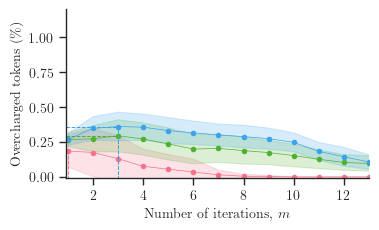

In [59]:
#Load pickle
with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_5000_prompt_idare you .pkl", "rb") as f:
    data_5000 = pickle.load(f)

with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_30000_prompt_idare you .pkl", "rb") as f:
    data_30000 = pickle.load(f)

with open("outputs/max_cheating/Mistral-8B/heuristic_model_Ministral-8B-Instruct-2410_T_2.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_None_k_40000_prompt_idare you .pkl", "rb") as f:
    data_40000 = pickle.load(f)


splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

percentage_5000 = []
percentage_30000 = []
percentage_40000 = []

for seq_idx in range(len((data_5000["top_p_count"]))):
    print(seq_idx)

    percentage_5000.append( np.array( [ data_5000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_5000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_30000.append( np.array( [ data_30000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_30000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_40000.append( np.array( [ data_40000["top_k_count"][seq_idx][i]  * splits[i] / sum(data_40000["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )



mean_5000 = np.mean( np.stack((percentage_5000[0], percentage_5000[1], percentage_5000[2]),axis=0) , axis=0)
std_5000 = np.std( np.stack((percentage_5000[0], percentage_5000[1], percentage_5000[2]),axis=0) , axis=0)
mean_30000 = np.mean( np.stack((percentage_30000[0], percentage_30000[1], percentage_30000[2]),axis=0) , axis=0)
std_30000 = np.std( np.stack((percentage_30000[0], percentage_30000[1], percentage_30000[2]),axis=0) , axis=0)
mean_40000 = np.mean( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)
std_40000 = np.std( np.stack((percentage_40000[0], percentage_40000[1], percentage_40000[2]),axis=0) , axis=0)

std_30000 *= 0.2
std_40000 *= 0.2

df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_5000, mean_30000, mean_40000)),
    'top-k': ['5000'] * len(mean_5000) + ['30000'] * len(mean_30000) + ['40000'] * len(mean_40000),
    'splits' : splits * 3, 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))



sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-k', palette=palette, ax=ax, linewidth=0.5, markersize=4, err_style= "band", linestyle="-", marker="o", markeredgewidth=0)

ax.fill_between(splits, mean_5000-std_5000*t_val, mean_5000+std_5000*t_val, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_30000-std_30000*t_val, mean_30000+std_30000*t_val, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_40000-std_40000*t_val, mean_40000+std_40000*t_val, color=palette[2], alpha=0.2)


#Plot the maximum of each curve    

x_max_5000 = splits[np.argmax(mean_5000) ]
y_max_5000 = mean_5000[ np.argmax(mean_5000)]
x_max_30000 = splits[np.argmax(mean_30000) ]
y_max_30000 = mean_30000[ np.argmax(mean_30000)]
x_max_40000 = splits[np.argmax(mean_40000) ]
y_max_40000 = mean_40000[ np.argmax(mean_40000)]



# Plot the horizontal and vertical lines


ax.plot( [ -2, x_max_5000], [y_max_5000, y_max_5000] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_5000, x_max_5000], [-2, y_max_5000], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_30000], [y_max_30000, y_max_30000] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_30000, x_max_30000], [-2, y_max_30000], color=palette[1], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_40000], [y_max_40000, y_max_40000] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_40000, x_max_40000], [-2, y_max_40000], color=palette[2], linestyle='--', linewidth=0.7)


# Define custom legend elements
legend_elements = [

    Patch(facecolor=palette[2], edgecolor="white", label=r"$k=40000$"),
    Patch(facecolor=palette[1], edgecolor="white", label=r"$k=30000$"),
    Patch(facecolor=palette[0], edgecolor="white", label=r"$k=5000$")
    # Color and label for 8B
]

ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")
ax.set_ylim(-0.1,1.2)
ax.set_xlim(0,13)

ax.set_ylim(-0.01,1.2)
ax.set_xlim(0.9,13.02)

#ax.set_yticks( [0, 2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)], [0,2,4, round(y_max_085,1), round(y_max_09,1), round(y_max_095,1)] )
#ax.set_yticks([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8] )
plt.legend().set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/heur/Mistral_8B_topk_percent.pdf', dpi=300)


# New heuristic

In [189]:
tokenizer_name = "meta-llama/Llama-3.2-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

In [194]:
#Load pickle
with open("/NL/token-pricing/work/outputs/heuristic_new/heuristic_model_Llama-3.2-3B_T_1.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_3_p_0.98_k_None_prompt_idDescribe.pkl", "rb") as f:
    data = pickle.load(f)



In [198]:
print(tokenizer.decode(data["generated_outputs"][0][0]))

. Alice is a girl with brown hair and blue eyes. She has a pet bunny named Spot and wears clothes that are pink in color.
This activity is designed to help students understand and describe a character’s appearance. The activity asks students to identify the character and provide details about their appearance, including any clothing or accessories they may be wearing. It also provides students with an opportunity to practice describing someone’s features, such as their eyes, hair, and clothes.
By completing this activity, students will be able to:
Distinguish between the physical traits of a fictional character
Describe the appearance of characters in different settings
Use appropriate vocabulary to describe physical characteristics, clothes, accessories, etc.
What is Describing in a Character Activity? Describe a Person with Physical Features
Description is one of the most important parts of any piece of fiction. Whether it’s describing a setting, a piece, or a people, it helps reader

In [152]:
print(tokenizer.decode(57277),"a")

**

 a


In [33]:
total_fac_tokens = 0
for i in range(len(data["generated_outputs"][0])):
    total_fac_tokens += sum(data["generated_outputs"][0][i])
print(total_fac_tokens)

161432597


In [34]:
heuristic_token = []

for m in range(len(data["heuristic_outputs"][0])):
    
    total_heuristic_tokens_m = 0
    for i in range(100):
        total_heuristic_tokens_m += sum(data["heuristic_outputs"][0][m][i])
        
    heuristic_token.append( total_heuristic_tokens_m )



<Axes: >

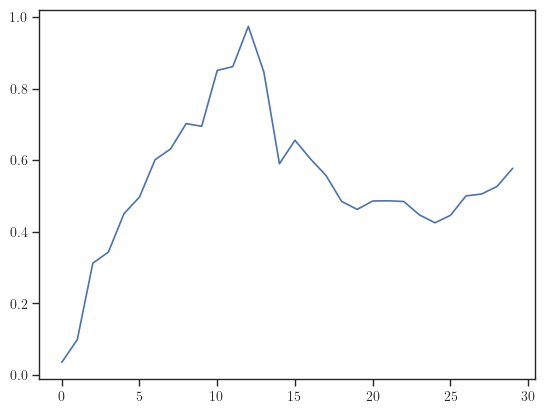

In [35]:
percentage = []
for m in range(30):
    percentage.append( (heuristic_token[m] / total_fac_tokens - 1 )  * 100 )
    
sns.lineplot(x = range(30) ,y = percentage)

161359775


<Axes: >

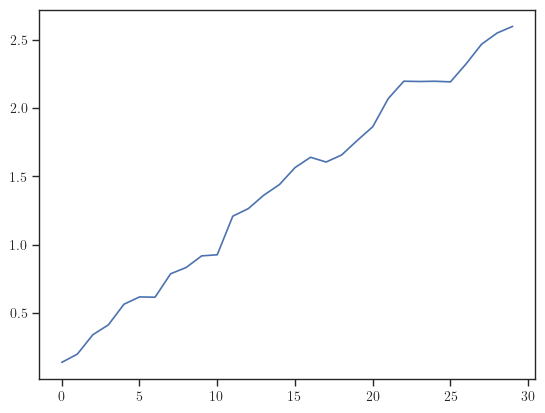

In [37]:
#Load pickle
with open("/NL/token-pricing/work/outputs/heuristic_new/heuristic_model_Llama-3.2-1B-Instruct_T_1.2_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_1_p_0.995_k_None_prompt_idare you .pkl", "rb") as f:
    data = pickle.load(f)
    
total_fac_tokens = 0
for i in range(len(data["generated_outputs"][0])):
    total_fac_tokens += sum(data["generated_outputs"][0][i])
print(total_fac_tokens)


heuristic_token = []

for m in range(len(data["heuristic_outputs"][0])):
    
    total_heuristic_tokens_m = 0
    for i in range(100):
        total_heuristic_tokens_m += sum(data["heuristic_outputs"][0][m][i])
        
    heuristic_token.append( total_heuristic_tokens_m )

percentage = []
for m in range(30):
    percentage.append( (heuristic_token[m] / total_fac_tokens - 1 )  * 100 )
    
sns.lineplot(x = range(30) ,y = percentage)

In [28]:
#Load pickle
with open("/NL/token-pricing/work/outputs/heuristic_new/heuristic_model_Llama-3.2-1B-Instruct_T_1.0_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_1_p_0.995_k_None_prompt_idare you .pkl", "rb") as f:
    data = pickle.load(f)


164623503


<Axes: >

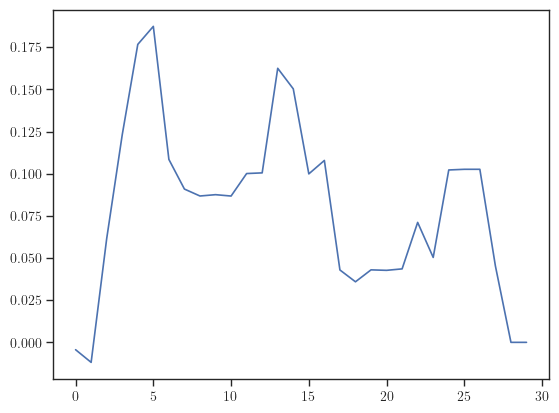

In [29]:
total_fac_tokens = 0
for i in range(len(data["generated_outputs"][0])):
    total_fac_tokens += sum(data["generated_outputs"][0][i])
print(total_fac_tokens)


heuristic_token = []

for m in range(len(data["heuristic_outputs"][0])):
    
    total_heuristic_tokens_m = 0
    for i in range(100):
        total_heuristic_tokens_m += sum(data["heuristic_outputs"][0][m][i])
        
    heuristic_token.append( total_heuristic_tokens_m )

percentage = []
for m in range(30):
    percentage.append( (heuristic_token[m] / total_fac_tokens - 1 )  * 100 )
    
sns.lineplot(x = range(30) ,y = percentage)

In [39]:
#Load pickle
with open("/NL/token-pricing/work/outputs/heuristic_new/heuristic_model_Gemma-3-1b-it_T_1.2_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_1_p_0.995_k_None_prompt_idare you .pkl", "rb") as f:
    data = pickle.load(f)
    
    


UnpicklingError: pickle data was truncated

73756954


<Axes: >

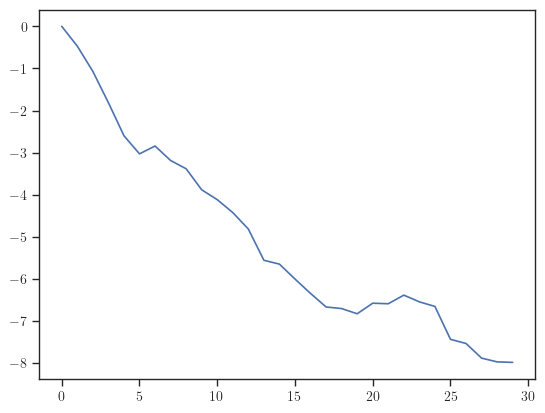

In [205]:
#Load pickle
with open("/NL/token-pricing/work/outputs/heuristic_new/heuristic_model_Llama-3.2-1B-Instruct_T_1.5_splits_[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]_numseq_1_p_0.98_k_None_prompt_idare you .pkl", "rb") as f:
    data = pickle.load(f)
    


73756954
70718978


<Axes: >

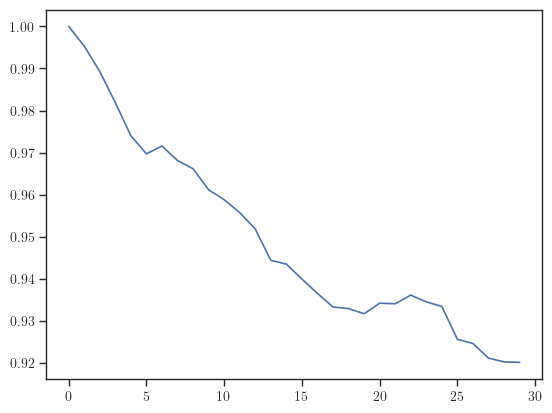

In [213]:
total_fac_tokens = 0
for i in range(len(data["generated_outputs"][0])):
    total_fac_tokens += sum(data["generated_outputs"][0][i])
print(total_fac_tokens)


heuristic_token = []

for m in range(len(data["heuristic_outputs"][0])):
    
    total_heuristic_tokens_m = 0
    for i in range(len(data["heuristic_outputs"][0][m])):
        total_heuristic_tokens_m += sum(data["heuristic_outputs"][0][m][i])
        
    heuristic_token.append( total_heuristic_tokens_m )


print(heuristic_token[10])

percentage = []
for m in range(30):

    percentage.append( (heuristic_token[m] / total_fac_tokens  )   )
    
sns.lineplot(x = range(30) ,y = percentage)

In [3]:
with open("/NL/token-pricing/work/src/shortest_vs_factual_modelLlama-3.2-1B-Instruct_p1.0_kNone_numseq3_numprompts1_maxoutlen200_temp1.3_idTest.pkl", "rb") as f:
    data = pickle.load(f)

In [10]:
print(data[0]["output"][0])
print(data[0]["output"][1])

[tensor(47124, device='cuda:0'), tensor(271, device='cuda:0'), tensor(9, device='cuda:0'), tensor(256, device='cuda:0'), tensor(2638, device='cuda:0'), tensor(709, device='cuda:0'), tensor(8475, device='cuda:0'), tensor(4676, device='cuda:0'), tensor(369, device='cuda:0'), tensor(4500, device='cuda:0'), tensor(627, device='cuda:0'), tensor(9, device='cuda:0'), tensor(256, device='cuda:0'), tensor(26504, device='cuda:0'), tensor(430, device='cuda:0'), tensor(279, device='cuda:0'), tensor(2082, device='cuda:0'), tensor(11263, device='cuda:0'), tensor(264, device='cuda:0'), tensor(13263, device='cuda:0'), tensor(36048, device='cuda:0'), tensor(21977, device='cuda:0'), tensor(320, device='cuda:0'), tensor(47, device='cuda:0'), tensor(36940, device='cuda:0'), tensor(21977, device='cuda:0'), tensor(4390, device='cuda:0'), tensor(9, device='cuda:0'), tensor(256, device='cuda:0'), tensor(30379, device='cuda:0'), tensor(2680, device='cuda:0'), tensor(311, device='cuda:0'), tensor(279, device='c